# Student's T test: checking for equal means

### This notebook is licensed  under [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1) © 2024 by Xavier Luri (ICCUB)

This test is applied to compare the means of two samples. Given two samples:

* $(x_1, \ldots, x_N)$ of mean $\overline{x}$
* $(y_1, \ldots, y_M)$ of mean $\overline{y}$

If the distributions from which the two samples have been generated __have the same variance__ we can define a test to compare the two means $\overline{x}$ and $\overline{y}$ and decide if they are compatible.

Let the standard error of the sample mean differences be:

$s_D = \sqrt{ 
         \frac
            { \sum_{i=1}^{N}(x_i-\overline{x})^2 + \sum_{i=1}^{N}(y_i-\overline{y})^2 } 
            {N+M-2} 
         \left( \frac{1}{N}+\frac{1}{M} \right)
}$

__Null hipothesis $H_0$:__ the distributions of the two samples have the same mean and the same variance.

Then, if $H_0$ is true, the statistic:

$t = \frac{\overline{x}-\overline{y}}{s_D}$

Follows a student T distribution with N+M-2 degrees of freedom. Using $t$ the Student T test is defined; the significance of the test is defined as $P( |x| \geq |t| )$

The Student T distribution is depicted below. Notice how the significance $P$ decreases as the value of t increases.

## Example of test using two normal samples, equal variances

We can play making the means similar or different to see how the test works.

<function matplotlib.pyplot.show(close=None, block=None)>

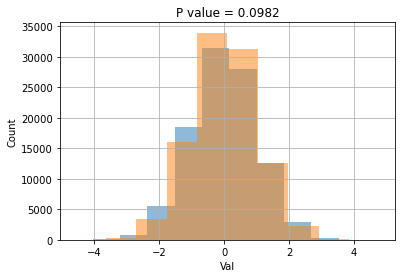

In [3]:
%matplotlib inline
import scipy.stats as scp
import matplotlib.pylab as plt
import numpy as np

# Parameters of the normal distributions to use
# and number of points per sample
mu1=0
mu2=0.01
sig=1

N= 100000
M= 100000

# Generate a normal sample 
x = scp.norm.rvs(mu1, sig, N)
y = scp.norm.rvs(mu2, sig, M)

# Plot histograms
h= plt.hist(x,alpha=0.5)
h= plt.hist(y,alpha=0.5)
plt.grid(True)
plt.xlabel('Val')
plt.ylabel('Count')


# Run test
t_stat, p_val = scp.ttest_ind(x, y, equal_var=True)   # Use t-test assuming equal variances

t = plt.title("P value = {:.4f}".format(p_val))
plt.show

## Extended case: distributions with unequal variances

If the distribution from which the samples have been drawn have unequal variances, the $t$ statistic can be redefined as:

$t = \frac
        {\overline{x}-\overline{y}}
        { \sqrt{ \frac{var(x)}{N} + \frac{var(y)}{M} } }
$

that follows a Student T distribution with $K$ degrees of freedom, where:

$K = \frac
         { \left[ \frac{var(x)}{N} + \frac{var(y)}{M} \right]^2 }
         { \frac{(var(x)/N)^2}{N-1} + \frac{(var(y)/M)^2}{M-1} }
$

As before, the significance of the test is defined as $P( |x| \geq |t| )$

## Example of test using two normal samples, unequal variances


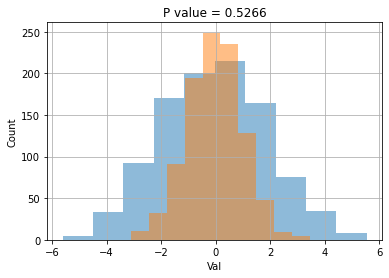

In [2]:
%matplotlib inline
import scipy.stats as scp
import matplotlib.pylab as plt
import numpy as np

# Parameters of the normal distributions to use
# and number of points per sample
mu1=0
sig1=2
mu2=0
sig2=1

N= 1000
M= 1000

# Generate a normal sample 
x = scp.norm.rvs(mu1, sig1, N)
y = scp.norm.rvs(mu2, sig2, N)

# Plot histograms
h= plt.hist(x, alpha=0.5)
h= plt.hist(y, alpha=0.5)
plt.grid(True)
plt.xlabel('Val')
plt.ylabel('Count')


# Run test
t_stat, p_val = scp.ttest_ind(x, y, equal_var=False)   # Use t-test assuming unequal variances

t = plt.title("P value = {:.4f}".format(p_val))
plt.show()